<a href="https://colab.research.google.com/github/6arlos6/Ideal_Gas/blob/main/Idela_Gas_N_particles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar librerias:



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation

import scipy.stats as stats
import scipy.io

# Definir Clase < Particle > :

In [2]:
class Particle:
  def __init__(self, mass, radius, position, velocity):
    self.mass = mass
    self.radius = radius
    self.position = position
    self.velocity = velocity

# Constantes y tiempo:

In [4]:
# Constantes:

N = 50

inferior_box = -20
superior_box = 20

Ra = -1.
Rb = 15.

r0 = 0.2
R = 2
mu, sigma = 0., 15.
m = 0.01

FPS = 10

# Tiempo:

Dt = 0.001
time = np.arange(0,30.0,Dt)

# Condiciones Iniciales ( $ \mathbf{r}_{i}(0)$ , $\mathbf{v}_{i}(0)$):

## Funcion para def. $ \mathbf{r}_{i}(0)$ sin solapes:

In [5]:
def initial_pos(N, r0, R, a, b):
# N := Numero de particulas.
# r0 := radio de las particulas.
# R := Dimension del sistema.
# s:= Rango maximo de volumen.
  r = np.zeros((N,R))
  for i in range(1,N):
    band0 = 1
    while band0 >= 1:
      band0 = 0
      rt = (b-a)*np.random.rand(1,R) + a
      for j in range(0, i):
        rij = np.linalg.norm(rt - r[j])
        if rij <= 2*r0:
          band0 +=1
    r[i] = rt
  return r

## Definir ensemble + C.I.

In [6]:
Ensemble_Particles = []

R0 = initial_pos(N, r0, R, Ra, Rb)

for i in range(0,N):
  zpi = np.zeros([len(time),R])
  zpi[0] = R0[i]
  zvi = np.zeros([len(time),R])
  zvi[0] = np.random.normal(mu, sigma, [R])
  Ensemble_Particles.append(Particle(m, r0, zpi, zvi))


# Eventos - Interacciones:

## Función de choque con paredes:

In [7]:
def isWall(p,n,m,r,i):

	tf1 = 0
	tf2 = 0

	if p.position[i,1] < (n + r) or p.position[i,1] >= m - r:
		p.velocity[i,1] = -p.velocity[i,1]
		p.velocity[i+1] = p.velocity[i]
		tf1 = 1

	if p.position[i,0] < (n + r) or p.position[i,0] >= m - r:
		p.velocity[i,0] = -p.velocity[i,0]
		p.velocity[i+1] = p.velocity[i]
		tf2 = 1

	if tf1 == 0 and tf2 == 0:
		p.velocity[i+1] = p.velocity[i]

	return p

## Función de colición entre particulas:

In [8]:
def isCollision(p1,p2,i):

	# i = 1 ---- j = 2

	a = (p1.position[i,0] - p2.position[i,0])**2
	b = (p1.position[i,1] - p2.position[i,1])**2
	d = np.sqrt(a + b)

	if d < (p1.radius + p2.radius)**1.1:
		rij = (p1.position[i] - p2.position[i])/(d)
		A = -2*((p1.mass*p2.mass)/(p1.mass + p2.mass))
		B = p1.velocity[i] - p2.velocity[i]
		C = np.dot(B, rij)
		q = (A*C)*rij
		p1.velocity[i] = p1.velocity[i] + q/p1.mass
		p1.velocity[i+1] = p1.velocity[i]
		p2.velocity[i] = p2.velocity[i] - q/p2.mass
		p2.velocity[i+1] = p2.velocity[i]

	return p1, p2

# Evolución temporal ( $ \mathbf{r}_{i}(t)$ , $\mathbf{v}_{i}(t)$):

In [9]:
for i in range(0,len(time)-1):
  print('time = {} [s] \n'.format(time[i]))

  for j in range(0,N):
    pj = Ensemble_Particles[j]
    pj = isWall(pj, inferior_box, superior_box, pj.radius, i)
    Ensemble_Particles[j] = pj

  for ki in range(0,N):
    for kj in range(ki+1,N):
      pki = Ensemble_Particles[ki]
      pkj = Ensemble_Particles[kj]
      pki, pkj = isCollision(pki,pkj,i)
      Ensemble_Particles[ki] = pki
      Ensemble_Particles[kj] = pkj

  for j in range(0,N):
    pj = Ensemble_Particles[j]
    pj.position[i+1] = pj.position[i] + pj.velocity[i]*Dt
    Ensemble_Particles[j] = pj

Se truncaron las últimas líneas 5000 del resultado de transmisión.
time = 27.499000000000002 [s] 

time = 27.5 [s] 

time = 27.501 [s] 

time = 27.502 [s] 

time = 27.503 [s] 

time = 27.504 [s] 

time = 27.505 [s] 

time = 27.506 [s] 

time = 27.507 [s] 

time = 27.508 [s] 

time = 27.509 [s] 

time = 27.51 [s] 

time = 27.511 [s] 

time = 27.512 [s] 

time = 27.513 [s] 

time = 27.514 [s] 

time = 27.515 [s] 

time = 27.516000000000002 [s] 

time = 27.517 [s] 

time = 27.518 [s] 

time = 27.519000000000002 [s] 

time = 27.52 [s] 

time = 27.521 [s] 

time = 27.522000000000002 [s] 

time = 27.523 [s] 

time = 27.524 [s] 

time = 27.525000000000002 [s] 

time = 27.526 [s] 

time = 27.527 [s] 

time = 27.528000000000002 [s] 

time = 27.529 [s] 

time = 27.53 [s] 

time = 27.531 [s] 

time = 27.532 [s] 

time = 27.533 [s] 

time = 27.534 [s] 

time = 27.535 [s] 

time = 27.536 [s] 

time = 27.537 [s] 

time = 27.538 [s] 

time = 27.539 [s] 

time = 27.54 [s] 

time = 27.541 [s] 

time = 

In [10]:
Speed = []
for j in range(0,N):
  pj = Ensemble_Particles[j]
  v = pj.velocity
  Speed.append(v)

Speed = np.array(Speed )
name = 'speed' + str(N) + '.mat'
scipy.io.savemat(name, {'Speed': Speed})

# Distribución de Boltzman < velocidades $f(v)$ >  :






In [13]:
#Fitting function
from scipy.optimize import curve_fit

def func(v, A):
  p = A*v*np.exp(-(A*v**2)/(2))
  return p

Ao = 14.


 

[1.9, 5.6, 7.6, 8.7, 9.2, 9.8, 11.7, 12.9, 13.9, 13.0, 15.3, 14.6, 17.1, 18.9, 18.8, 20.7, 13.6, 22.7, 19.4, 24.6, 25.5, 26.1, 23.5, 28.3, 29.5, 28.5, 31.4, 29.2, 33.8, 29.7, 35.9, 36.0, 39.0, 40.2, 42.2, 14.7, 17.0, 17.7, 17.8, 19.3, 20.8, 20.2, 20.5, 21.9, 25.3]
[1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]
(0, 13.029508916286883)
[ 1.9    2.706  3.512  4.318  5.124  5.93   6.736  7.542  8.348  9.154
  9.96  10.766 11.572 12.378 13.184 13.99  14.796 15.602 16.408 17.214
 18.02  18.826 19.632 20.438 21.244 22.05  22.856 23.662 24.468 25.274
 26.08  26.886 27.692 28.498 29.304 30.11  30.916 31.722 32.528 33.334
 34.14  34.946 35.752 36.558 37.364 38.17  38.976 39.782 40.588 41.394
 42.2  ]


ValueError: ignored

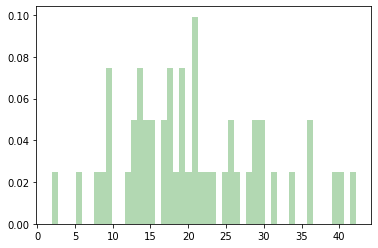

In [12]:
V = []

for j in range(0,N):
  pj = Ensemble_Particles[j]
  v = pj.velocity[-1]
  vm = np.sqrt(v[0]**2 + v[1]**2)
  V.append(vm)

V = np.round(V, 1)
Vl = V.tolist()
Vs = set(Vl)
VL = list(Vs)

Vv = []
for i in range(0,len(VL)):
  n = np.where(V == VL[i])
  Vv.append(len(n[0]))
print(VL)
print(Vv)

params = stats.maxwell.fit(V, floc=0)
print(params)

A = plt.hist(V,len(V), facecolor='g', alpha=0.3, density=True)
print(A[1])

x = np.linspace(0, 60, 100)
plt.plot(A[0],A[1])
#plt.plot(x, stats.maxwell.pdf(x, *params), lw=3)

plt.grid()
plt.xlabel('speed')
plt.ylabel('N particles')
plt.show()

    

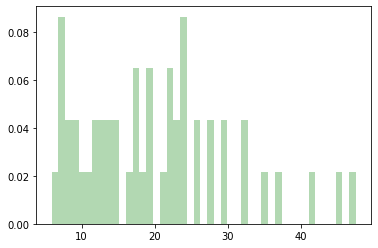

In [14]:
fig = plt.figure()
ax = fig.gca()

def actualizar(i):
  i = i*FPS
  ax.clear()
  V = []
  for j in range(0,N):
    pj = Ensemble_Particles[j]
    v = pj.velocity[i]
    vm = np.sqrt(v[0]**2 + v[1]**2)
    V.append(vm)
  V = np.round(V, 1)
  plt.hist(V,45, facecolor='g', alpha=0.3, density=True)
 
ani = animation.FuncAnimation(fig, 
							func = actualizar, 
							frames = int(len(time)/FPS),
						  blit=False, 
							repeat=True)

ani.save('Histogram_speed.gif', writer = "pillow", fps=10)

# Animación:

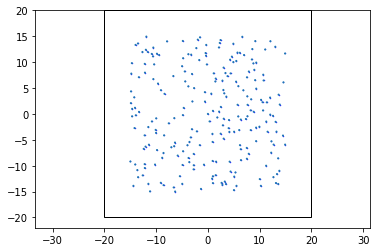

In [ ]:
fig = plt.figure()
ax = fig.gca()

def actualizar(i):
  i = i*FPS
  ax.clear()
  ax.set_aspect("equal", adjustable="datalim")
  ax.set_xlim(inferior_box -2, superior_box)
  ax.set_ylim(inferior_box -2 , superior_box)
  ax.add_patch(
      patches.Rectangle((inferior_box, inferior_box),
                        superior_box-inferior_box, superior_box-inferior_box,
                        edgecolor='black', facecolor="none"))
  AB = []
  for j in range(0,N):
    pj = Ensemble_Particles[j]
    aj = pj.position[i,0]
    bj = pj.position[i,1]
    ax.add_patch(plt.Circle((aj,bj), pj.radius))
    plt.scatter(pj.position[i,0],pj.position[i,1],s=(pj.radius),c='b')
    AB.append((aj,bj))
 
ani = animation.FuncAnimation(fig, 
							func = actualizar, 
							frames = int(len(time)/FPS),
						  blit=False, 
							repeat=True)

ani.save('Ideal_gas.gif', writer = "pillow", fps=10)